In [ ]:
!pip install autoviz

In [ ]:

#importing Autoviz class
from autoviz.AutoViz_Class import AutoViz_Class#Instantiate the AutoViz class
AV = AutoViz_Class()

In [ ]:
df = AV.AutoViz('/content/sample_data/APM-Report-33051.')

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

df = pd.read_csv("/content/sample_data/APM-Report-33051.csv")
df.drop(df.tail(1).index,inplace=True)
df['Date'] = df['Date'].astype(str)
#df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

df2 = pd.read_csv("/content/sample_data/APM-Report-73843.csv")
df2.drop(df2.tail(1).index,inplace=True)
df2['Date'] = df2['Date'].astype(str)
#df2['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')


df3 = pd.read_csv("/content/sample_data/MIA_05012019_to_09302019_Weather.csv")
df3.drop(df2.tail(1).index,inplace=True)
df3['Date'] = df3['Date'].astype(str)

df4 = pd.merge(df, df2,  how='inner', left_on=['Date','Hour'], right_on = ['Date','Local Hour'])
df4 = pd.merge(df4, df3,  how='inner', left_on=['Date','Hour'], right_on = ['Date','Local Hour'])
df4 = df4.drop(columns=['Local Hour_x', 'Local Hour_y'])

# Convert these features to int so it can be plotted and sorted
df4['Scheduled Departures'] = df4['Scheduled Departures'].astype(int)
df4['Scheduled Arrivals'] = df4['Scheduled Arrivals'].astype(int)
df4['Departures For Metric Computation'] = df4['Departures For Metric Computation'].astype(int)
df4['Arrivals For Metric Computation'] = df4['Arrivals For Metric Computation'].astype(int)

df4['Departures For Efficiency Computation'] = df4['Departures For Efficiency Computation'].astype(int)
df4['Arrivals For Efficiency Computation'] = df4['Arrivals For Efficiency Computation'].astype(int)
df4['Total For Efficiency Computation'] = df4['Total For Efficiency Computation'].astype(int)

df4['Departure Demand Units'] = df4['Departure Demand Units'].astype(int)
df4['Arrival Demand Units'] = df4['Arrival Demand Units'].astype(int)
df4['Total Demand Units'] = df4['Total Demand Units'].astype(int)
df4['Efficiency AAR'] = df4['Efficiency AAR'].astype(int)
df4['ADR'] = df4['ADR'].astype(int)
df4['Capacity AAR'] = df4['Capacity AAR'].astype(int)
df4['ADR Plus Capacity AAR'] = df4['ADR Plus Capacity AAR'].astype(int)

#convert  date to numeric for analysis, ordinal = days since jan 1 year 1
df4['Date'] = pd.to_datetime(df4['Date'], format='%m/%d/%Y')
df4['Date'] = df4['Date'].map(dt.datetime.toordinal)

df4.info()

df4

FileNotFoundError: ignored

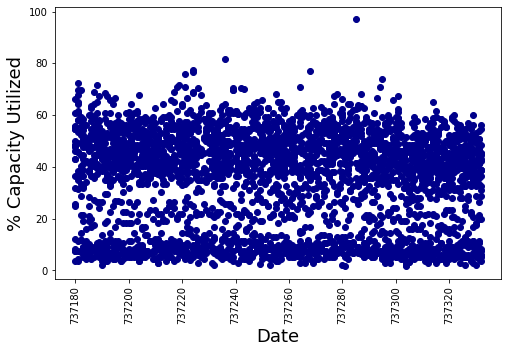

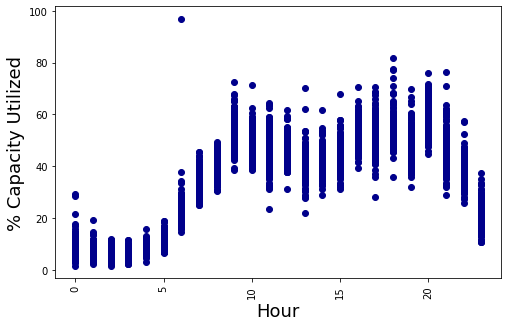

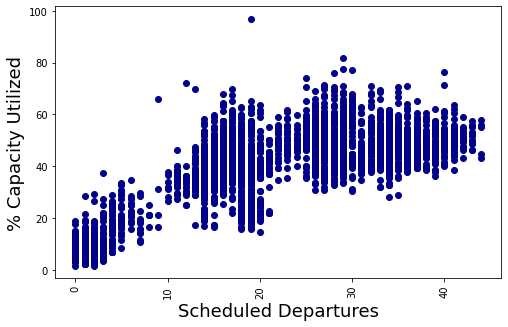

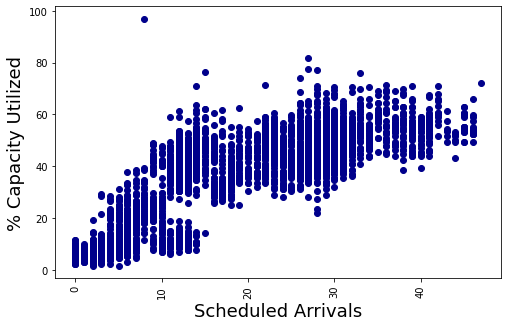

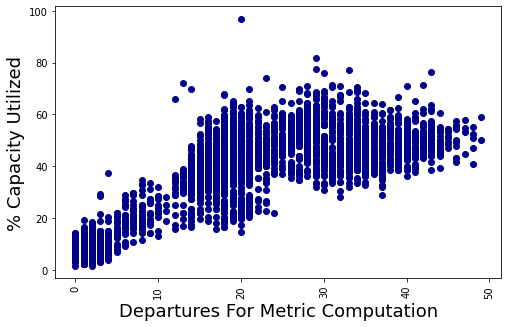

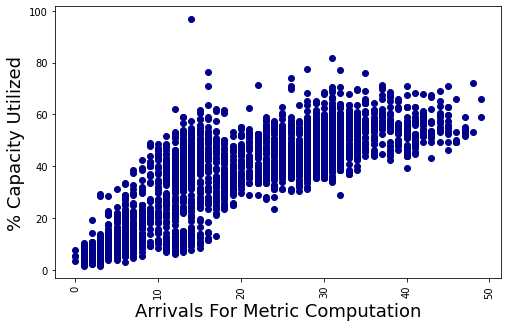

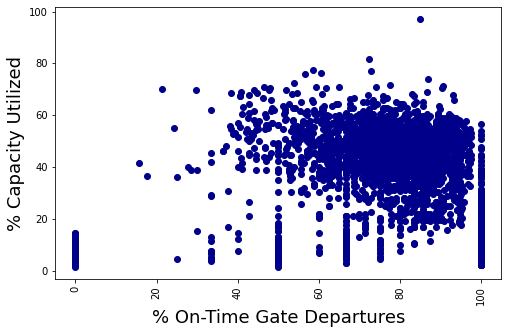

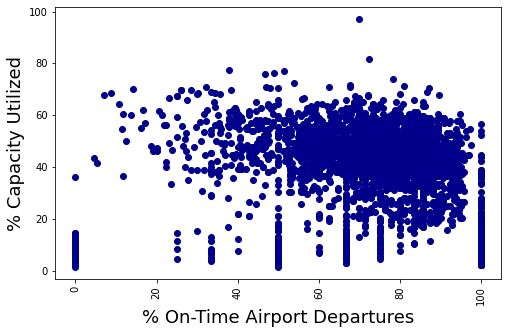

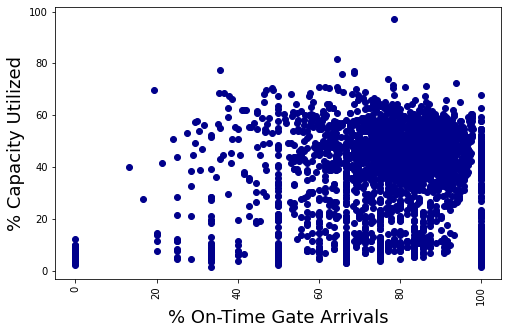

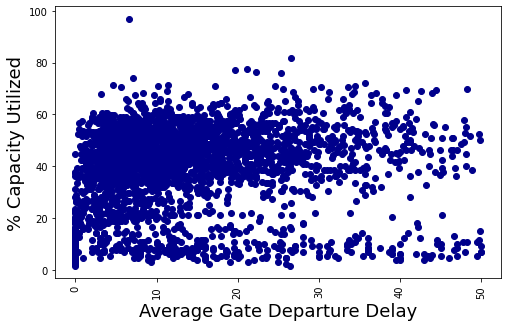

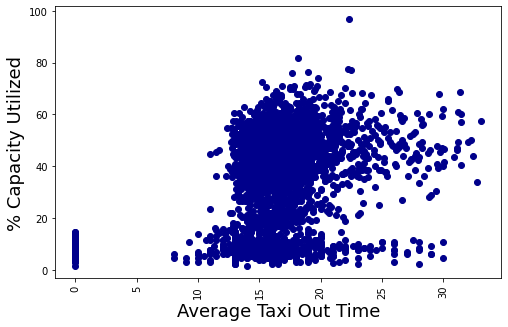

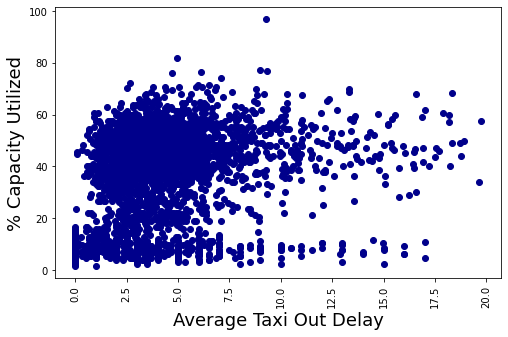

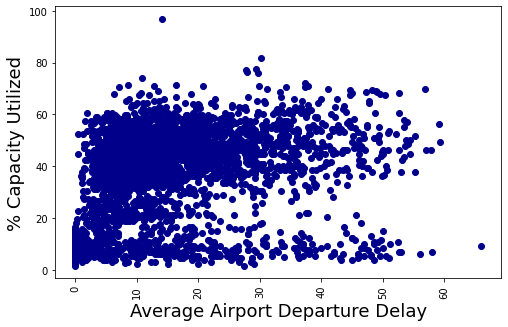

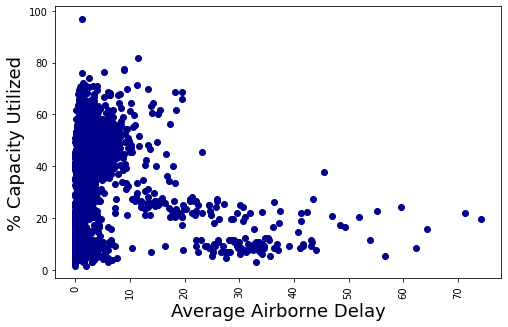

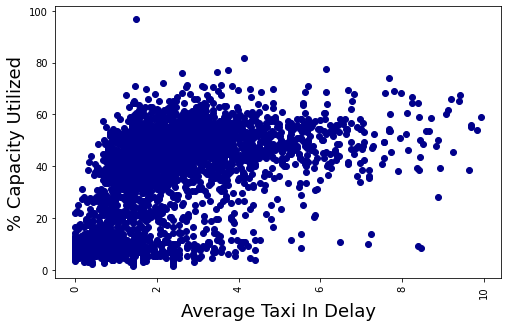

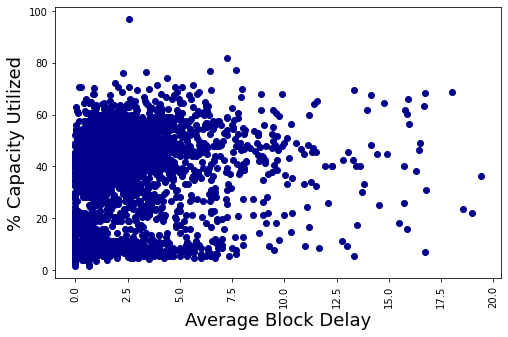

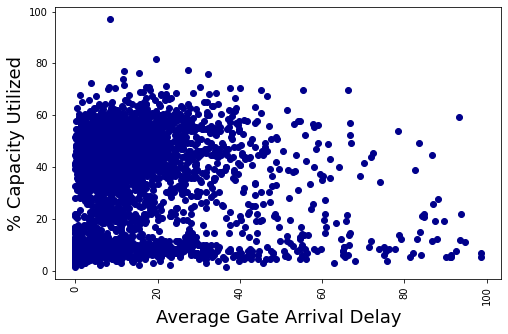

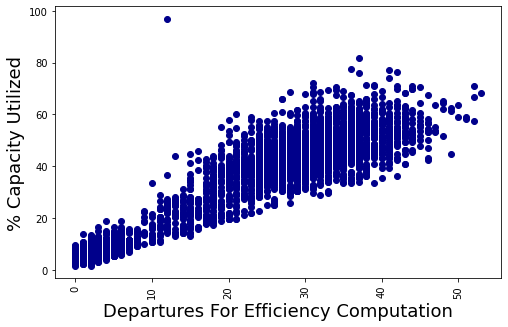

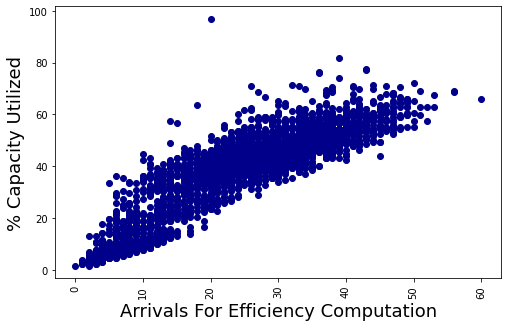

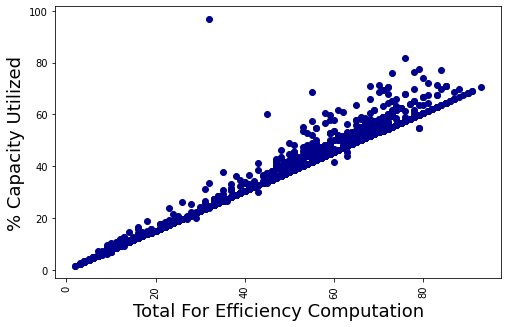

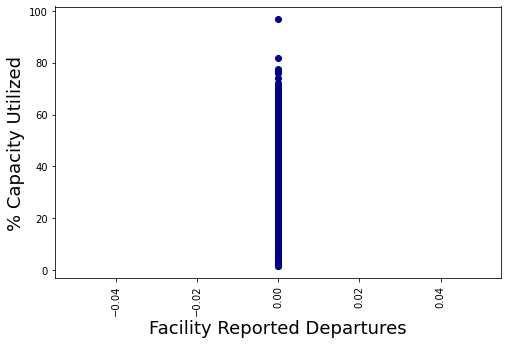

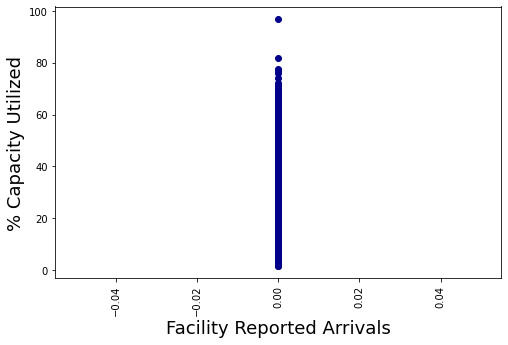

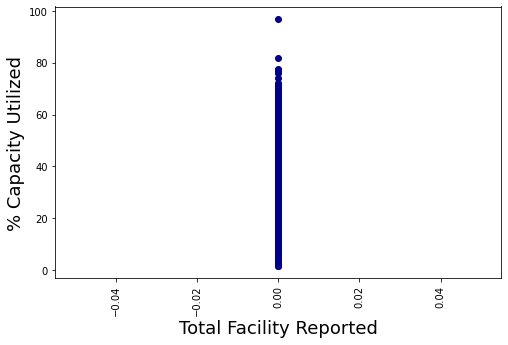

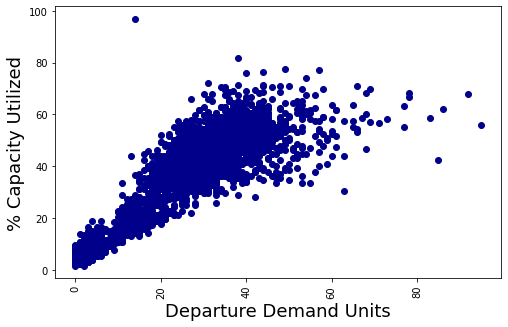

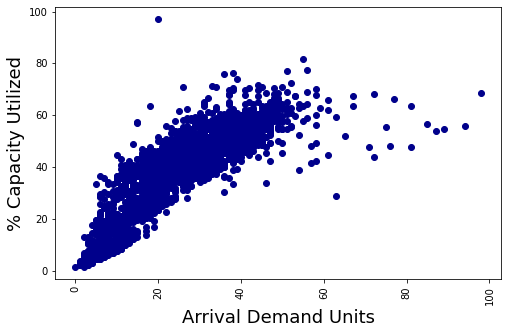

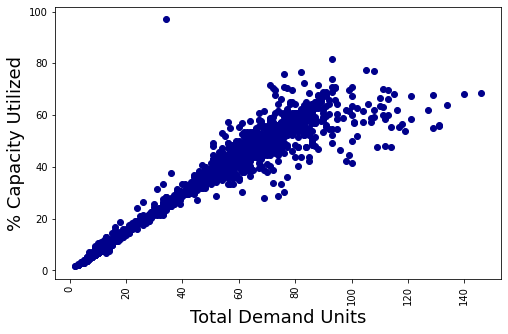

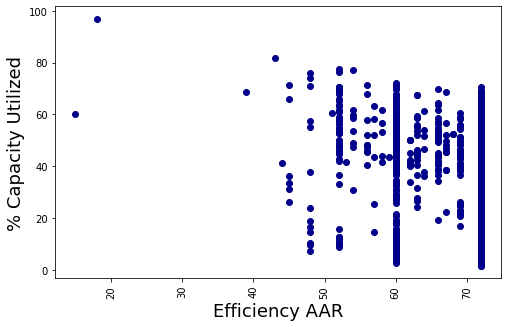

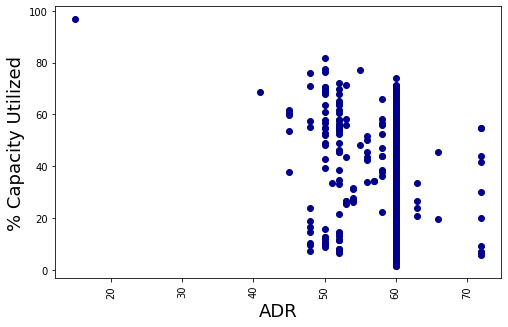

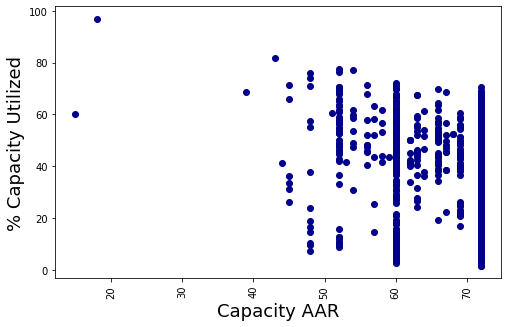

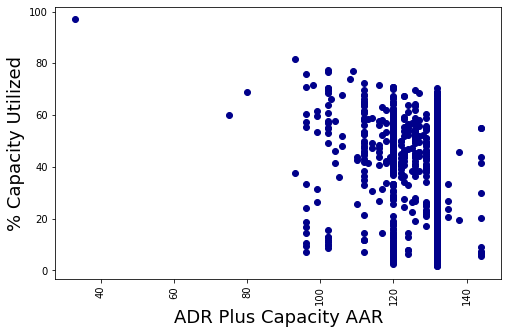

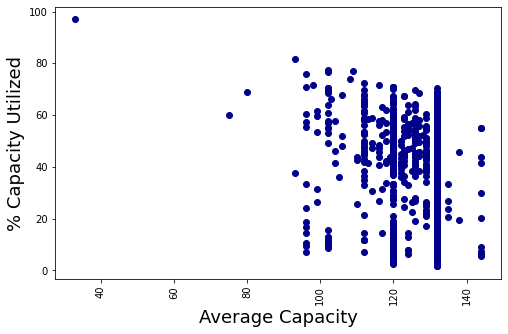

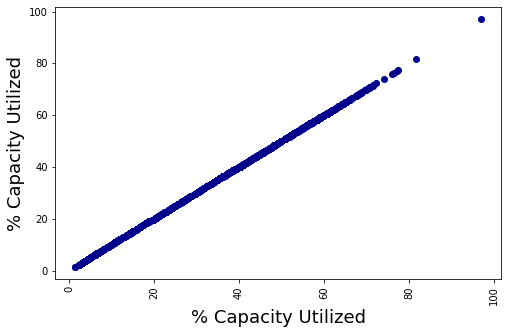

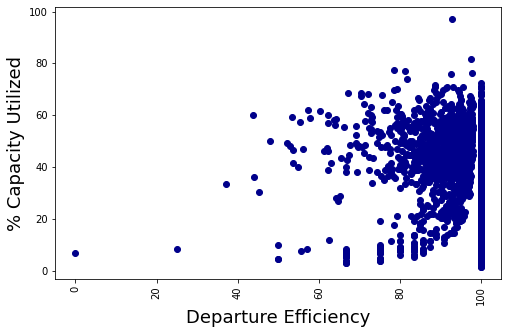

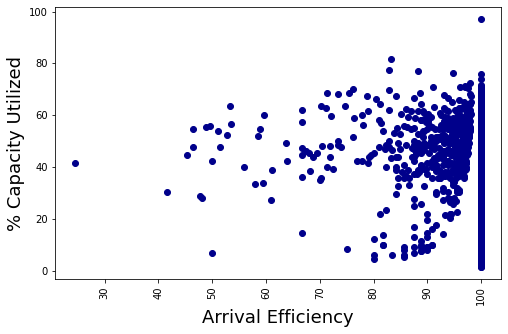

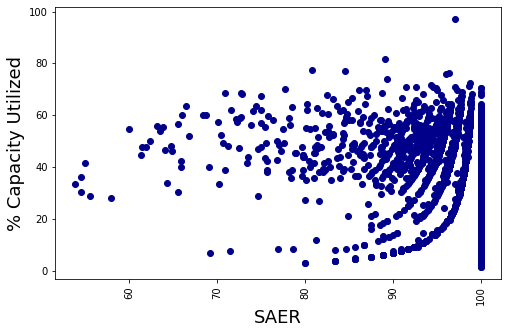

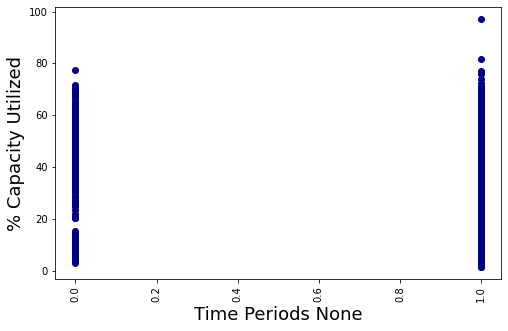

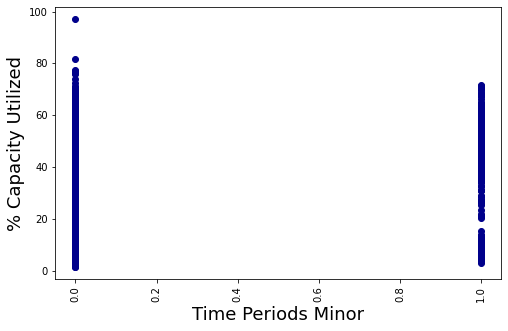

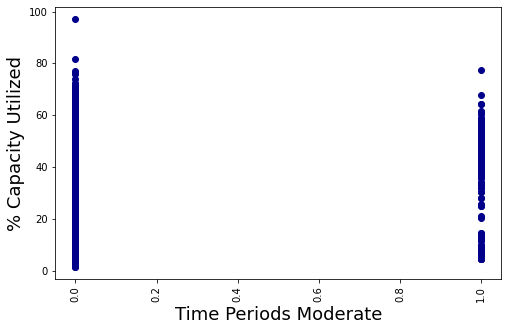

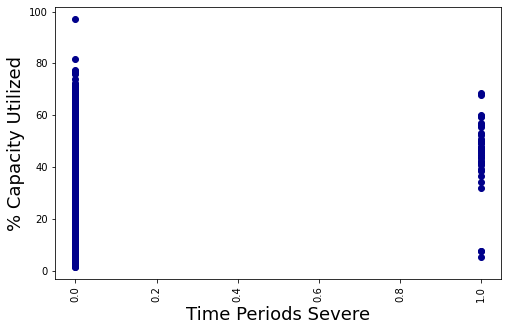

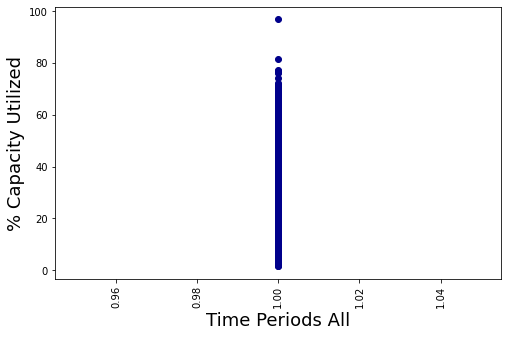

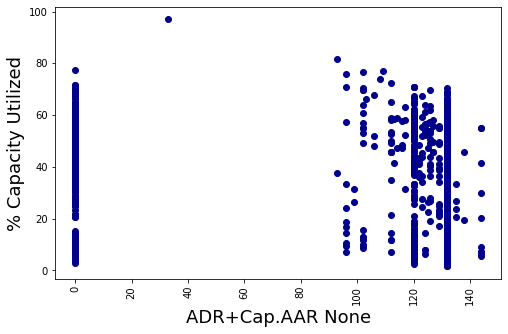

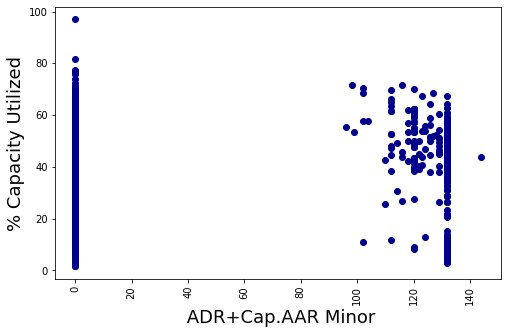

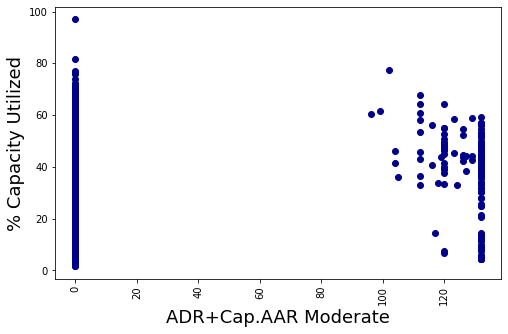

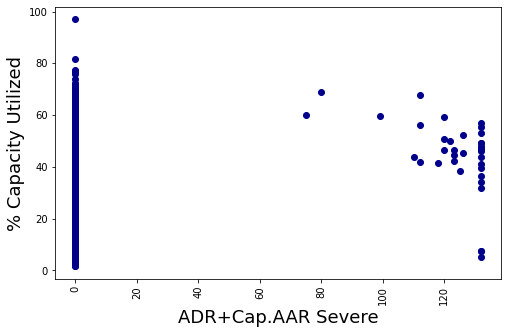

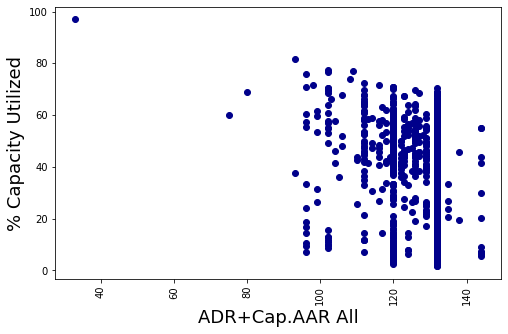

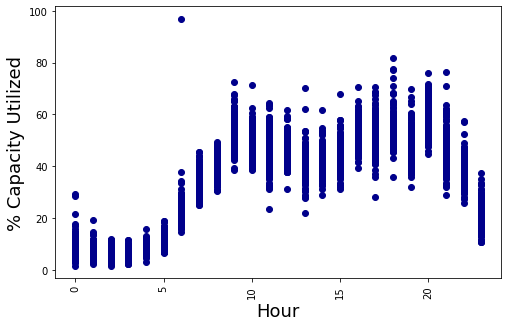

In [ ]:
# doesnt make sense for capacity % to be over 100
df4 = df4[df4['% Capacity Utilized'] <= 100]
df4 = df4[df4['Average Gate Departure Delay'] <= 50]
df4 = df4[df4['Average Taxi Out Delay'] <= 20]
df4 = df4[df4['Average Taxi In Delay'] <= 10]
df4 = df4[df4['Average Block Delay'] <= 20]
df4 = df4[df4['Average Gate Arrival Delay'] <= 100]



for column in df4.columns[0:]:
  f = plt.figure()
  f.set_figwidth(8)
  f.set_figheight(5)
  plt.scatter(df4[column], df4['% Capacity Utilized'], c='DarkBlue')
  plt.xlabel(column, fontsize=18)
  plt.ylabel('% Capacity Utilized', fontsize=18)
  plt.xticks(rotation='vertical')
  plt.show()

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
plt.scatter(df4['Hour'], df4['% Capacity Utilized'], c='DarkBlue')
plt.xlabel('Hour', fontsize=18)
plt.ylabel('% Capacity Utilized', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = df4.select_dtypes(include=numerics)


scaler = StandardScaler(copy=True, with_std=True)
scaler_model = scaler.fit(numeric_columns)

df4_standardized = pd.DataFrame(scaler_model.transform(numeric_columns), columns=list(numeric_columns.columns))

display(df4_standardized)



,Date,Hour,Scheduled Departures,Scheduled Arrivals,Departures For Metric Computation,Arrivals For Metric Computation,% On-Time Gate Departures,% On-Time Airport Departures,% On-Time Gate Arrivals,Average Gate Departure Delay,Average Taxi Out Time,Average Taxi Out Delay,Average Airport Departure Delay,Average Airborne Delay,Average Taxi In Delay,Average Block Delay,Average Gate Arrival Delay,Departures For Efficiency Computation,Arrivals For Efficiency Computation,Total For Efficiency Computation,Facility Reported Departures,Facility Reported Arrivals,Total Facility Reported,Departure Demand Units,Arrival Demand Units,Total Demand Units,Efficiency AAR,ADR,Capacity AAR,ADR Plus Capacity AAR,Average Capacity,% Capacity Utilized,Departure Efficiency,Arrival Efficiency,SAER,Time Periods None,Time Periods Minor,Time Periods Moderate,Time Periods Severe,Time Periods All,ADR+Cap.AAR None,ADR+Cap.AAR Minor,ADR+Cap.AAR Moderate,ADR+Cap.AAR Severe,ADR+Cap.AAR All
0,-1.715681,-1.665297,-1.387524,-1.289056,-1.334772,-1.450940,1.034266,1.169707,-1.650808,-1.079429,-0.165479,-0.187137,-0.929600,-0.480958,-1.456476,-0.918009,2.651518,-1.233537,-1.494669,-1.474586,0.0,0.0,0.0,-1.198458,-1.425616,-1.433165,0.349356,0.12689,0.349356,0.318564,0.318564,-1.469411,0.590847,0.31706,0.596063,0.431417,-0.329822,-0.224556,-0.104494,0.0,0.458092,-0.329208,-0.224088,-0.10384,0.318564
1,-1.715681,-1.519895,-1.230347,-1.373995,-1.334772,-1.366372,1.034266,1.169707,-0.703078,-1.079429,-0.272899,-0.661477,-1.049944,-0.480958,-0.591054,0.501928,-0.305139,-1.540878,-1.252751,-1.517217,0.0,0.0,0.0,-1.466858,-1.204718,-1.471669,0.349356,0.12689,0.349356,0.318564,0.318564,-1.510460,0.590847,0.31706,0.596063,0.431417,-0.329822,-0.224556,-0.104494,0.0,0.458092,-0.329208,-0.224088,-0.10384,0.318564
2,-1.715681,-1.374493,-1.308936,-1.289056,-1.259452,-1.450940,-1.750412,-1.469976,1.191814,0.936037,-0.272899,-0.661477,0.741570,-0.480958,0.336183,-0.531105,-0.936336,-1.310372,-1.494669,-1.517217,0.0,0.0,0.0,-1.265558,-1.425616,-1.471669,0.349356,0.12689,0.349356,0.318564,0.318564,-1.510460,0.590847,0.31706,0.596063,0.431417,-0.329822,-0.224556,-0.104494,0.0,0.458092,-0.329208,-0.224088,-0.10384,0.318564
3,-1.715681,-1.229091,-1.387524,-1.458935,-1.259452,-1.535507,-1.750412,-1.469976,1.191814,0.876471,0.012837,-0.240896,0.821799,-0.480958,-0.591054,-0.918009,-0.969557,-1.540878,-1.655948,-1.730372,0.0,0.0,0.0,-1.466858,-1.572881,-1.664184,0.349356,0.12689,0.349356,0.318564,0.318564,-1.717894,0.590847,0.31706,0.596063,0.431417,-0.329822,-0.224556,-0.104494,0.0,0.458092,-0.329208,-0.224088,-0.10384,0.318564
4,-1.715681,-0.938287,-1.230347,-0.694477,-1.108811,-0.689834,-1.471819,-1.205889,-1.392129,2.014450,-0.573673,-0.977704,1.661797,-0.348130,-0.430333,0.138238,4.285321,-1.310372,-1.010834,-1.261431,0.0,0.0,0.0,-1.265558,-0.983821,-1.240650,0.349356,0.12689,0.349356,0.318564,0.318564,-1.261976,0.590847,0.31706,0.596063,-2.317941,3.031940,-0.224556,-0.104494,0.0,-2.305763,3.135713,-0.224088,-0.10384,0.318564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,1.687881,0.951941,0.812953,1.089257,0.698877,1.424349,0.602384,0.487119,0.244084,-0.548669,-0.043021,-0.199786,-0.599057,-0.116045,0.379454,-0.175154,-0.487854,0.764180,1.327705,1.125902,0.0,0.0,0.0,0.680341,1.151521,0.992534,0.349356,0.12689,0.349356,0.318564,0.318564,1.060304,-0.138534,0.31706,0.132114,0.431417,-0.329822,-0.224556,-0.104494,0.0,0.458092,-0.329208,-0.224088,-0.10384,0.318564
3329,1.687881,1.097343,1.048719,0.324800,1.376760,0.324974,0.374748,0.127612,0.944506,-0.204608,0.337243,0.369421,-0.140147,-0.175891,0.979068,-0.209975,-0.819398,0.380004,0.037477,0.230652,0.0,0.0,0.0,0.277741,-0.026599,0.145464,0.349356,0.12689,0.349356,0.318564,0.318564,0.189517,0.150152,0.31706,0.266143,0.431417,-0.329822,-0.224556,-0.104494,0.0,0.458092,-0.329208,-0.224088,-0.10384,0.3185

In [ ]:
import numpy as np
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
df4_cov = df4_standardized.cov()
print(df4_cov)

eigen_values, eigen_vectors = np.linalg.eig(df4_cov)
print(eigen_values)

                                           Date      Hour  \
Date                                   1.000300  0.014239   
Hour                                   0.014239  1.000300   
Scheduled Departures                  -0.024723  0.598100   
Scheduled Arrivals                    -0.024151  0.513584   
Departures For Metric Computation     -0.031728  0.599729   
Arrivals For Metric Computation       -0.028054  0.501835   
% On-Time Gate Departures              0.061865  0.043779   
% On-Time Airport Departures           0.082566 -0.026260   
% On-Time Gate Arrivals                0.088413 -0.120234   
Average Gate Departure Delay          -0.102061  0.359854   
Average Taxi Out Time                 -0.089473  0.346540   
Average Taxi Out Delay                -0.094014  0.296945   
Average Airport Departure Delay       -0.118167  0.378248   
Average Airborne Delay                -0.107878 -0.129206   
Average Taxi In Delay                 -0.030525  0.457436   
Average Block Delay     

In [ ]:
from sklearn import linear_model
X = df4[list(df4.drop(columns='% Capacity Utilized').columns)]
y = df4['% Capacity Utilized']

lr = linear_model.LinearRegression()
lr.fit(X, y)

LinearRegression()

In [ ]:
df = pd.read_html("/content/sample_data/MIA_05012019_to_09302019_Capacty.xls")

In [ ]:
df_class = pd.read_csv("/content/sample_data/MIA_05012019_to_09302019_Capacty.csv")

In [ ]:
df_class


,Carrier,Selling Carrier,Flight Number,ACID,Aircraft,Departure Airport,Arrival Airport,Schedule Present,Start Of Demand Date,Wheels Off Time,EDCT Delay,Starting Bin Adjusted,ETE,Unadjusted Start Of Demand Time,Start Of Demand Time,End Of Demand Time,Start Of Demand End Of Demand Diff,Scheduled Gate Arrival,Flight Plan Gate Arrival,AZ Time,Taxi In Time,Actual Gate Arrival,Start Qtr (hh-q),End Qtr (hh-q),Total Number Of Qtrs,Current Period Qtrs,Actual
0,UAL,UAL,832,UAL832,B737,IAH,MIA,Y,5/1/2019,21:29,0,NaN,117,0:26,0:22,0:22,0.0,21:54,22:36,0:22,3,0:25,'00-2,'00-2,1,1,Yes
1,THY,THY,6589,THY6589,B744,LTBA,MIA,N,5/1/2019,20:25,0,NaN,674,0:39,0:32,0:32,0.0,0:44,0:44,0:32,7,0:39,'00-3,'00-3,1,1,Yes
2,LTG,LTG,8410,LTG8410,B763,SEQM,MIA,N,5/1/2019,19:57,0,NaN,218,0:35,0:35,0:35,0.0,0:34,0:34,0:38,7,0:45,'00-3,'00-3,1,1,Yes
3,DAL,DAL,1251,DAL1251,A321,ATL,MIA,Y,5/1/2019,23:38,0,NaN,85,1:03,0:58,0:58,0.0,0:51,0:51,0:58,5,1:03,'00-4,'00-4,1,1,Yes
4,MPH,MPH,6122,MPH6122,B744,SKBO,MIA,Y,5/1/2019,20:59,0,NaN,192,1:11,1:08,1:08,0.0,23:50,1:29,1:09,7,1:16,'01-1,'01-1,1,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82174,DAL,DAL,1585,DAL1585,A321,ATL,MIA,Y,9/30/2019,21:26,0,NaN,85,22:51,22:46,22:46,0.0,22:45,22:45,22:46,5,22:51,'22-4,'22-4,1,1,Yes
82175,RPA,AAL,4368,RPA4368,E75S,AUS,MIA,Y,9/30/2019,19:35,0,NaN,140,22:55,22:55,22:55,0.0,14:11,22:26,22:55,6,23:01,'22-4,'22-4,1,1,Yes
82176,CMP,CMP,441,CMP441,B738,MPTO,MIA,Y,9/30/2019,19:29,0,NaN,151,23:00,22:57,22:57,0.0,23:15,23:36,22:58,9,23:06,'22-4,'22-4,1,1,Yes
82177,DAL,DAL,527,DAL527,A320,MUHA,MIA,Y,9/30/2019,22:19,0,NaN,45,23:04,22:59,22:59,0.0,23:23,23:23,23:00,7,23:06,'22-4,'22-4,1,1,Yes
